In [10]:
import pandas as pd
import numpy as np
import torch as n
import matplotlib.pyplot as plt # type: ignore
import cv2 # type: ignore
import os
import random
from glob import glob
from PIL import Image

In [6]:
df = pd.read_csv('df2.csv')
df.head()

,filename,label,split,original
0,owxbbpjpch.mp4,FAKE,train,wynotylpnm.mp4
1,vpmyeepbep.mp4,REAL,train,NaN
2,fzvpbrzssi.mp4,REAL,train,NaN
3,htorvhbcae.mp4,FAKE,train,wclvkepakb.mp4
4,fckxaqjbxk.mp4,FAKE,train,vpmyeepbep.mp4


In [7]:
df.shape

(1334, 4)

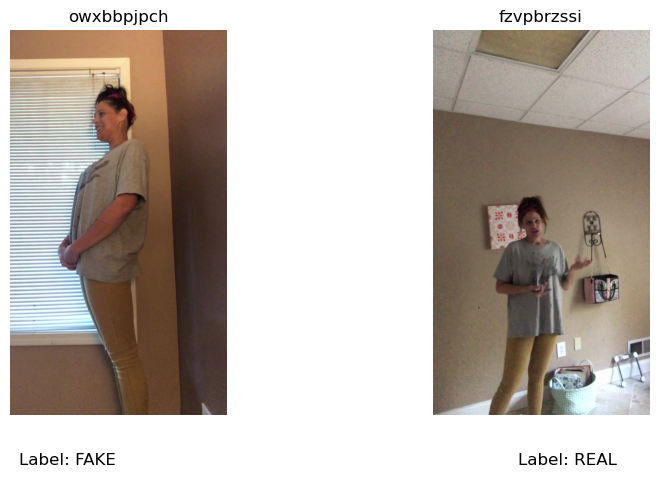

In [8]:
csv_path = "df2.csv"  # Update this if needed
df = pd.read_csv(csv_path)

# Directory where frames are stored
frames_dir = "train_df2_img"

# Function to visualize one frame from two different videos with labels
def visualize_two_videos_with_labels(video1, label1, video2, label2):
    video1_folder = os.path.join(frames_dir, video1)
    video2_folder = os.path.join(frames_dir, video2)

    # Get first available frame from each video folder
    frame1_path = sorted(glob(os.path.join(video1_folder, "*.jpg")))
    frame2_path = sorted(glob(os.path.join(video2_folder, "*.jpg")))

    if not frame1_path or not frame2_path:
        print("Could not find frames for one or both videos.")
        return

    frame1 = Image.open(frame1_path[0])  # First frame of video1
    frame2 = Image.open(frame2_path[0])  # First frame of video2

    # Plot the two frames side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(frame1)
    axes[0].set_title(video1)
    axes[0].axis("off")

    axes[1].imshow(frame2)
    axes[1].set_title(video2)
    axes[1].axis("off")

    # Adding labels below the images using fig.text()
    fig.text(0.25, 0.01, f"Label: {label1}", ha='center', fontsize=12)
    fig.text(0.75, 0.01, f"Label: {label2}", ha='center', fontsize=12)

    plt.show()

# Select two different videos from the CSV
video_names = df["filename"].str.replace(".mp4", "").tolist()[:3]  # Take first two unique videos
label1 = df.loc[df["filename"] == video_names[0] + ".mp4", "label"].values[0]
label2 = df.loc[df["filename"] == video_names[2] + ".mp4", "label"].values[0]

visualize_two_videos_with_labels(video_names[0], label1, video_names[2], label2)


Video 1: owxbbpjpch, Label: FAKE
Dimensions: 1080x1920, Mode: RGB, Format: JPEG
Mean Pixel Values (RGB): [131.8712066  111.07987317  96.81325473]
Video 2: fzvpbrzssi, Label: REAL
Dimensions: 1080x1920, Mode: RGB, Format: JPEG
Mean Pixel Values (RGB): [140.92447242 129.05167486 115.23775463]


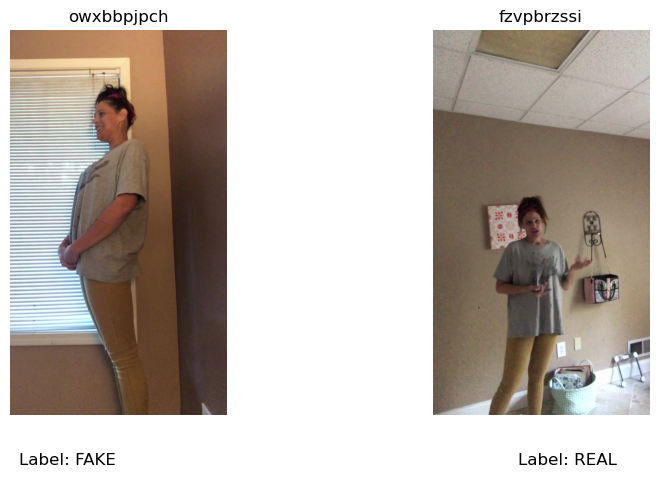

In [9]:
def visualize_two_videos_with_info(video1, label1, video2, label2):
    video1_folder = os.path.join(frames_dir, video1)
    video2_folder = os.path.join(frames_dir, video2)

    # Get first available frame from each video folder
    frame1_path = sorted(glob(os.path.join(video1_folder, "*.jpg")))
    frame2_path = sorted(glob(os.path.join(video2_folder, "*.jpg")))

    if not frame1_path or not frame2_path:
        print("Could not find frames for one or both videos.")
        return

    frame1 = Image.open(frame1_path[0])  # First frame of video1
    frame2 = Image.open(frame2_path[0])  # First frame of video2

    # Image information
    def get_image_info(image):
        # Getting image dimensions
        width, height = image.size
        mode = image.mode
        format = image.format
        # Calculating mean pixel value for each channel (RGB)
        np_image = np.array(image)
        mean_values = np.mean(np_image, axis=(0, 1))  # Mean per channel (R, G, B)
        return width, height, mode, format, mean_values

    frame1_info = get_image_info(frame1)
    frame2_info = get_image_info(frame2)

    # Print the image information
    print(f"Video 1: {video1}, Label: {label1}")
    print(f"Dimensions: {frame1_info[0]}x{frame1_info[1]}, Mode: {frame1_info[2]}, Format: {frame1_info[3]}")
    print(f"Mean Pixel Values (RGB): {frame1_info[4]}")
    
    print(f"Video 2: {video2}, Label: {label2}")
    print(f"Dimensions: {frame2_info[0]}x{frame2_info[1]}, Mode: {frame2_info[2]}, Format: {frame2_info[3]}")
    print(f"Mean Pixel Values (RGB): {frame2_info[4]}")
    
    # Plot the two frames side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(frame1)
    axes[0].set_title(video1)
    axes[0].axis("off")

    axes[1].imshow(frame2)
    axes[1].set_title(video2)
    axes[1].axis("off")

    # Adding labels below the images using fig.text()
    fig.text(0.25, 0.01, f"Label: {label1}", ha='center', fontsize=12)
    fig.text(0.75, 0.01, f"Label: {label2}", ha='center', fontsize=12)

    plt.show()
    
visualize_two_videos_with_info(video_names[0], label1, video_names[2], label2)